In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
import scipy
import csv

matplotlib.style.use('ggplot')
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', 50)

In [4]:
test_rating = pd.io.parsers.read_csv('raw/rating_test.csv')

In [5]:
content = pd.io.parsers.read_csv('content_recommendations.csv')
content['recs'] = content['recs'].apply(lambda s: map(lambda _s: _s.replace("'","").strip(), s[1:-1].split(',')) )

In [81]:
content_no_rating = pd.io.parsers.read_csv('content_recommendations_no_rating.csv')
content_no_rating['recs'] = content_no_rating['recs'].apply(lambda s: map(lambda _s: _s.replace("'","").strip(), s[1:-1].split(',')) )

In [6]:
collaborative = pd.io.parsers.read_csv('collaborative_recommendations.csv')
collaborative['recs'] = collaborative['recs'].apply(lambda s: map(lambda _s: _s.replace("'","").strip(), s[1:-1].split(',')) )
collaborative['size'] = collaborative['recs'].apply(lambda l: len(l))
collaborative = collaborative.loc[collaborative['size'] == 10]

In [117]:
user_ids = list(collaborative['user_id'].unique())
user_results = pd.DataFrame()

for user_id in user_ids:
    # Get the results of the collaborative filtering recommendations
    recommendations_cf = collaborative[collaborative['user_id']==user_id]['recs'].tolist()[0]
    recommendations_cf = set(map(lambda x: int(x), recommendations_cf))
    
    # print(recommendations_cf)
    # Get the results of the content based recommendations
    recommendations_cb = content[content['user_id']==user_id]['recs'].tolist()[0]
    recommendations_cb = set(map(lambda x: int(x), recommendations_cb))
    
    recommendations_cb_no_rating = content_no_rating[content_no_rating['user_id']==user_id]['recs'].tolist()[0]
    recommendations_cb_no_rating = set(map(lambda x: int(x), recommendations_cb_no_rating))
    
    # Get the test sample for the user
    watched_animes = test_rating['anime_id'][test_rating['user_id'] == user_id].astype(int).tolist()
    watched_animes = set(watched_animes)
    
    
    union = recommendations_cf.union(recommendations_cb)
    inter = recommendations_cf.intersection(recommendations_cb)
    
    # Get the denominator for the collaborative filtering and content based recommendations
    if len(watched_animes) > 10:
        denom = 10
    else:
        denom = len(watched_animes)
    
    if user_id == 32:
        print watched_animes
        print sorted(recommendations_cb)
        print sorted(recommendations_cf)
    
    # Get the 4 results for each user: number of matches for cf, cb, union and intersection
    res_cf = len(watched_animes.intersection(recommendations_cf)) #* 1.0 / denom
    res_cb = len(recommendations_cb.intersection(watched_animes)) #* 1.0 / denom
    res_cb_no_rating = len(recommendations_cb_no_rating.intersection(watched_animes)) #* 1.0 / denom
    res_union = len(union.intersection(watched_animes)) * 1.0 / min(len(union), len(watched_animes))
    if min(len(inter), len(watched_animes)) != 0:  
        res_intersection = len(inter.intersection(watched_animes)) * 1.0 / min(len(inter), len(watched_animes))
    else: 
        res_intersection = 0.0
        
    user_results = user_results.append({
        'user_id': user_id, 
        'res_cb': res_cb, 
        'res_cb_no_rating': res_cb_no_rating,  
        'res_cf':res_cf, 
        'res_union':res_union, 
        'res_inter':res_intersection, 
        'denom':denom, 
        'watched_animes': len(watched_animes)
    }, ignore_index=True)



set([120, 249, 317, 1535])
[249, 2707, 4997, 5231, 12175, 15059, 15783, 20045, 21595, 31289]
[121, 164, 199, 430, 512, 513, 528, 1117, 1118, 1943]


In [109]:
test_rating['anime_id'][test_rating['user_id'] == 377]

[11013, 11111]

In [114]:
user_results.loc[user_results['res_union'] > 0.3]

,user_id,res_cb,res_cf,res_union,denom,res_cb_no_rating,res_inter,watched_animes
29,87.00,0.00,4.00,0.33,10.00,0.00,0.00,12.00
70,210.00,0.00,7.00,0.35,10.00,0.00,0.00,75.00
78,240.00,0.00,3.00,0.33,9.00,0.00,0.00,9.00
93,282.00,0.00,7.00,0.35,10.00,0.00,0.00,53.00
98,300.00,1.00,6.00,0.35,10.00,1.00,0.00,22.00
108,321.00,0.00,7.00,0.35,10.00,0.00,0.00,58.00
134,376.00,0.00,2.00,0.67,3.00,0.00,0.00,3.00
135,377.00,0.00,2.00,1.00,2.00,0.00,0.00,2.00
142,391.00,0.00,2.00,0.50,4.00,0.00,0.00,4.00
150,410.00,0.00,2.00,0.40,5.00,0.00,0.00,5.00


In [57]:
user_results['res_union'].sum() / len(user_results['res_union'])

0.14005513690721089

In [125]:
user_results.describe()

,denom,res_cb,res_cb_no_rating,res_cf,res_inter,res_union,user_id,watched_animes
count,955.00,955.00,955.00,955.00,955.00,955.00,955.00,955.00
mean,9.36,0.07,0.04,2.12,0.01,0.14,"1,197.75",27.01
std,1.65,0.27,0.22,1.76,0.09,0.11,666.22,22.14
min,2.00,0.00,0.00,0.00,0.00,0.00,5.00,2.00
25%,10.00,0.00,0.00,1.00,0.00,0.05,629.00,12.00
50%,10.00,0.00,0.00,2.00,0.00,0.12,"1,210.00",20.00
75%,10.00,0.00,0.00,3.00,0.00,0.20,"1,760.00",35.00
max,10.00,3.00,3.00,10.00,1.00,1.00,"2,368.00",129.00


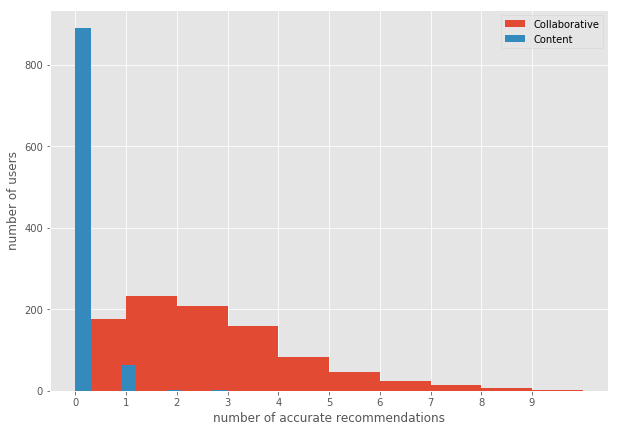

In [134]:
data=user_results['res_cf'].sort_values().plot(kind="hist", bins=10, label="Collaborative")
#y,binEdges=np.histogram(data,bins=10)
#bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
#plt.plot(bincenters,y,'-')

data=user_results['res_cb'].sort_values().plot(kind="hist", bins=10, label="Content", figsize=(10,7))
#y,binEdges=np.histogram(data,bins=10)
#bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
#plt.plot(bincenters,y,'-')

plt.xlabel('number of accurate recommendations')
plt.ylabel('number of users')
plt.legend()
plt.xticks(np.arange(0,10))
plt.show()


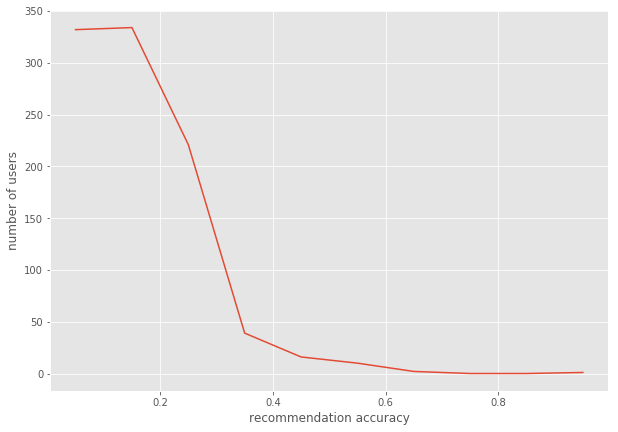

In [141]:
data=user_results['res_union'].sort_values()
y,binEdges=np.histogram(data,bins=10)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.figure(figsize=(10,7))
plt.plot(bincenters,y,'-')

plt.xlabel('recommendation accuracy')
plt.ylabel('number of users')
plt.show()